<a href="https://colab.research.google.com/github/Anipro-10/Random-Walk-Simulation/blob/main/Carbon_Diffusion_in_2D_Iron_Lattice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

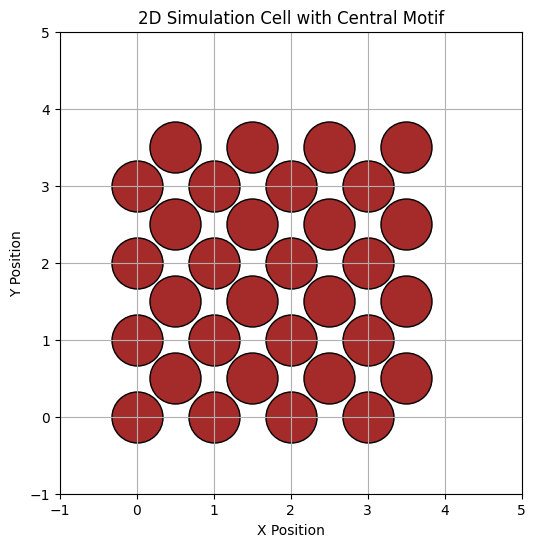

In [2]:
def create_2d_simulation_cell_with_motif(rows, cols, lattice_param):
    x_positions = []
    y_positions = []

    for i in range(rows):
        for j in range(cols):
            x_positions.append(j * lattice_param)
            y_positions.append(i * lattice_param)

            x_positions.append(j * lattice_param + lattice_param / 2)
            y_positions.append(i * lattice_param + lattice_param / 2)

    return x_positions, y_positions

rows = 4
cols = 4
lattice_param = 1.0

x, y = create_2d_simulation_cell_with_motif(rows, cols, lattice_param)

plt.figure(figsize=(6, 6))
plt.scatter(x, y, c='brown', s=1350, edgecolor='black')
plt.title('2D Simulation Cell with Central Motif')
plt.xlabel('X Position')
plt.ylabel('Y Position')

plt.xlim([-1, cols * lattice_param + 1])
plt.ylim([-1, rows * lattice_param + 1])

plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

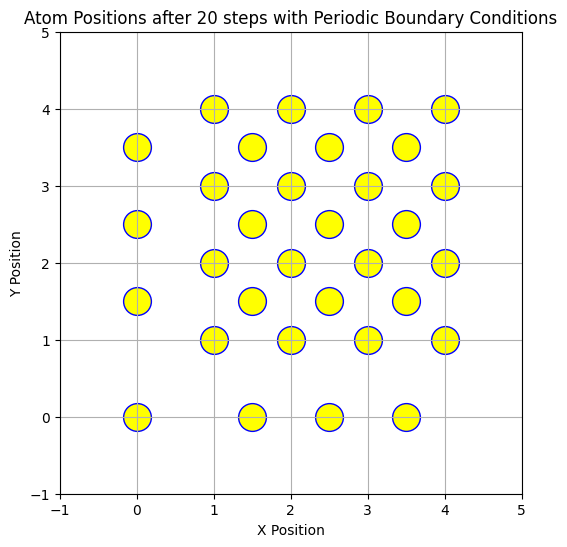

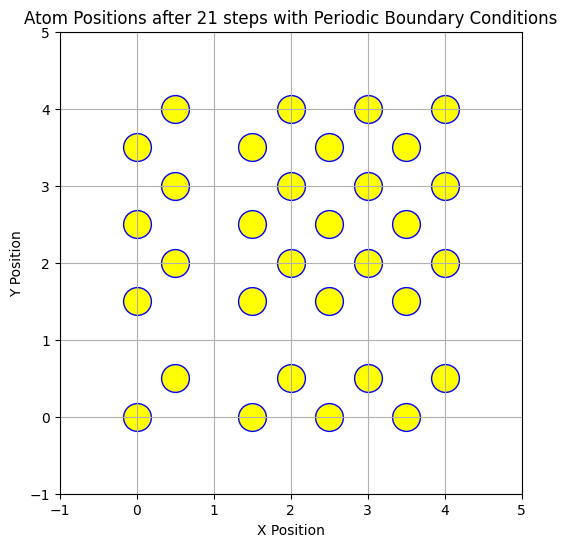

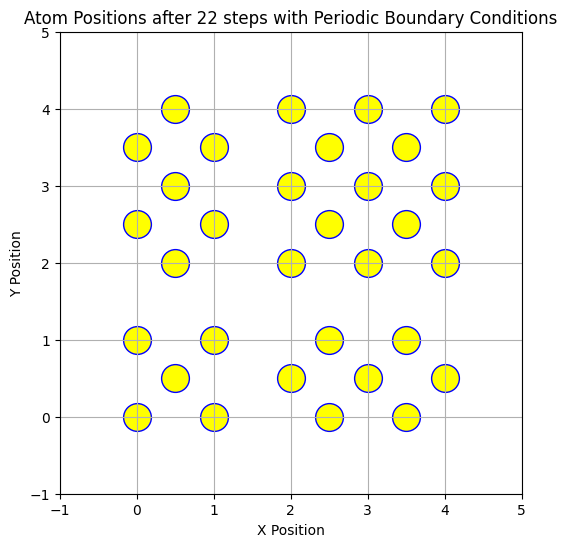

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def apply_periodic_boundary(position, box_length):
    return position % box_length

def create_2d_simulation_cell_with_motif(rows, cols, lattice_param):
    x_positions = []
    y_positions = []

    for i in range(rows):
        for j in range(cols):
            x_positions.append(j * lattice_param)
            y_positions.append(i * lattice_param)

            x_positions.append(j * lattice_param + lattice_param / 2)
            y_positions.append(i * lattice_param + lattice_param / 2)

    return x_positions, y_positions

def move_atoms_with_motif(x_positions, y_positions, lattice_param, steps, jump_x=0.5, jump_y=0.5):
    box_length = max(x_positions) + lattice_param
    for step in range(steps):
        x_positions = [(x + jump_x * lattice_param) for x in x_positions]
        y_positions = [(y + jump_y * lattice_param) for y in y_positions]

        x_positions = [apply_periodic_boundary(x, box_length) for x in x_positions]
        y_positions = [apply_periodic_boundary(y, box_length) for y in y_positions]

    return x_positions, y_positions

rows = 4
cols = 4
lattice_param = 1.0

x, y = create_2d_simulation_cell_with_motif(rows, cols, lattice_param)

steps_list = [20, 21, 22]
for steps in steps_list:
    x_moved, y_moved = move_atoms_with_motif(x, y, lattice_param, steps)

    plt.figure(figsize=(6, 6))
    plt.scatter(x_moved, y_moved, c='yellow', s=400, edgecolor='blue')
    plt.title(f'Atom Positions after {steps} steps with Periodic Boundary Conditions')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.grid(True)
    plt.xlim([-1, cols * lattice_param + 1])
    plt.ylim([-1, rows * lattice_param + 1])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

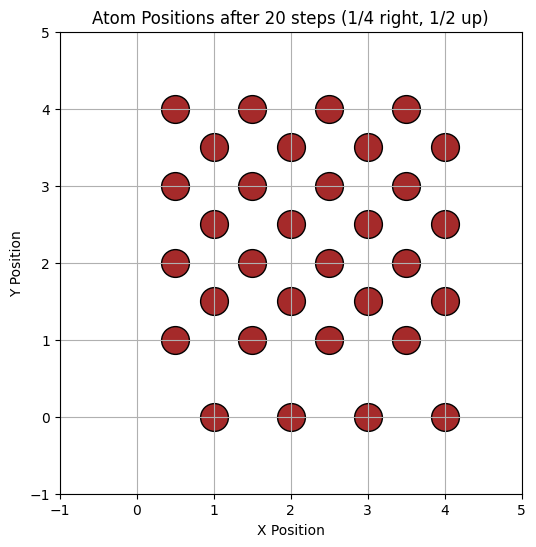

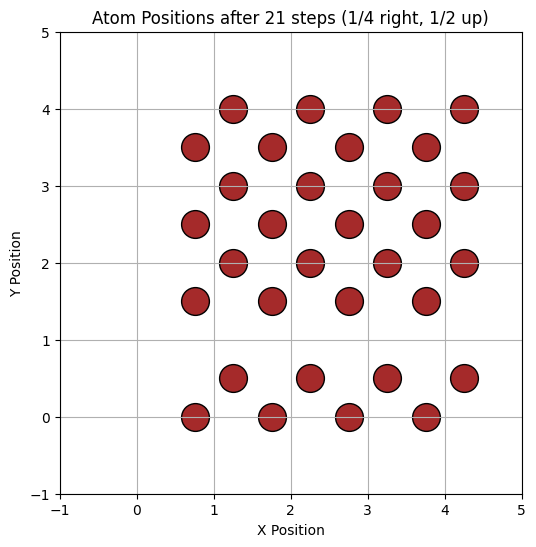

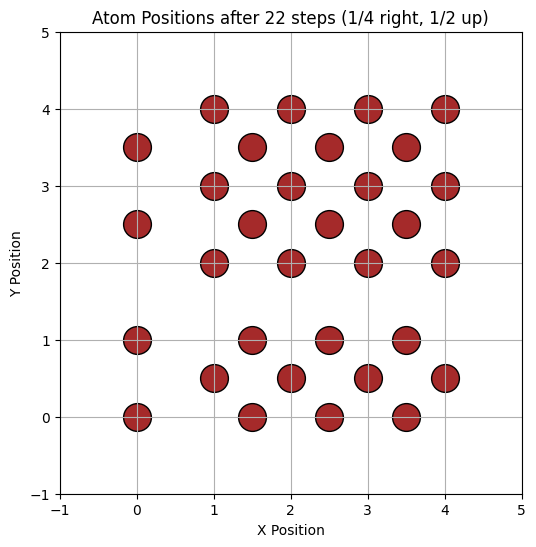

In [4]:
x, y = create_2d_simulation_cell_with_motif(rows, cols, lattice_param)

steps_list = [20, 21, 22]
for steps in steps_list:
    x_moved, y_moved = move_atoms_with_motif(x, y, lattice_param, steps, jump_x=0.25, jump_y=0.5)

    plt.figure(figsize=(6, 6))
    plt.scatter(x_moved, y_moved, c='brown', s=400, edgecolor='black')
    plt.title(f'Atom Positions after {steps} steps (1/4 right, 1/2 up)')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.grid(True)
    plt.xlim([-1, cols * lattice_param + 1])
    plt.ylim([-1, rows * lattice_param + 1])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

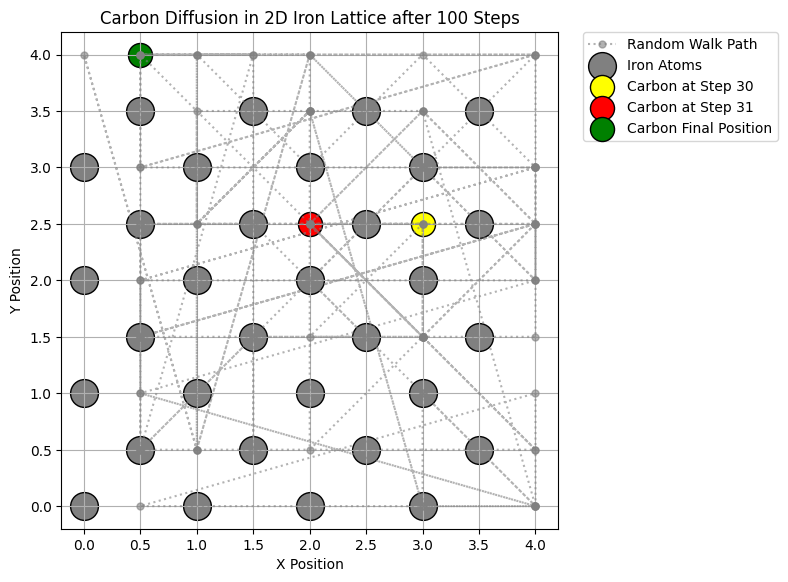

Mean Square Displacement after 100 steps: 4.46039603960396


In [6]:
import random
def random_walk_diffusion_with_snapshots(x_carbon, y_carbon, lattice_param, steps, box_length):
    x_positions = [x_carbon]
    y_positions = [y_carbon]

    for step in range(steps):
        move_x = random.choice([-lattice_param, 0, lattice_param])
        move_y = random.choice([-lattice_param, 0, lattice_param])

        x_carbon = apply_periodic_boundary(x_carbon + move_x, box_length)
        y_carbon = apply_periodic_boundary(y_carbon + move_y, box_length)

        x_positions.append(x_carbon)
        y_positions.append(y_carbon)

    return x_positions, y_positions

lattice_param = 1
x_carbon = lattice_param * 1.5
y_carbon = lattice_param * 1.5
steps = 100
snapshot_step = 30

x_walk, y_walk = random_walk_diffusion_with_snapshots(x_carbon, y_carbon, lattice_param, steps, box_length=max(x) + lattice_param)

plt.figure(figsize=(8, 8))
plt.plot(x_walk, y_walk, marker='o', markersize=5, linestyle=':', color='gray', alpha=0.6, label='Random Walk Path')

plt.scatter(x, y, c='gray', s=400, edgecolor='black', label='Iron Atoms')
plt.scatter(x_walk[snapshot_step], y_walk[snapshot_step],c='yellow',s=300,edgecolor='black',label=f'Carbon at Step {snapshot_step}')
plt.scatter(x_walk[snapshot_step + 1],y_walk[snapshot_step + 1],c='red',s=300,edgecolor='black',label=f'Carbon at Step {snapshot_step + 1}')
plt.scatter(x_walk[-1], y_walk[-1], c='green', s=300, edgecolor='black', label='Carbon Final Position')
plt.title(f'Carbon Diffusion in 2D Iron Lattice after {steps} Steps')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()

msd = np.mean([(x_walk[i] - x_walk[0]) ** 2 + (y_walk[i] - y_walk[0]) ** 2 for i in range(steps + 1)])
print(f"Mean Square Displacement after {steps} steps: {msd}")